In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load train and test data

In [2]:
from proj1_helpers import *
from data_helpers import *
from cross_validation import cross_validation
from implementations import ridge_regression
from cost import compute_loss
from plots import plot_cross_validation

### Load train and test data

In [3]:
# Data paths
DATA_TRAIN_PATH = 'data/train.csv'

# Load data
Y, X, id_train = load_csv_data(DATA_TRAIN_PATH)

### Get index for the three different jet groups

In [4]:
jet_train_samples = get_jet_samples(X)

### Define parameters

In [5]:
degrees = range(1,20)
lambda_test = 1e-3
lambdas = np.logspace(-8,-2,7)
k_fold = 4
seed = 1
degrees, lambdas

(range(1, 20), array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02]))

## Group 0

In [6]:
# get train and test data
train_index = jet_train_samples[0]
x, y = X[train_index], Y[train_index]

### Best degree

In [7]:
acc_training = []
acc_validation = []

for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_test)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))
        

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1 81.68087917367282 81.6718712466971
2 82.57900285584648 82.50960845544078
3 82.9610056850028 82.86792377292016
4 83.32032188325726 83.2122267595484
5 83.68564336616222 83.63259668508287
6 83.83844449782475 83.78272880134517
7 84.08566204927003 84.01893666426456
8 84.21410841540556 84.01593402193932
9 84.17140416900205 83.92285210985668
10 83.74969973576748 83.4744575226199
11 84.40260762804601 84.34922732004163
12 83.95154402540902 83.79674113219633
13 84.01059599113887 83.89282568660421
14 78.85539274561614 78.92545439987188
15 70.4499959964769 69.6292737609096
16 71.66673339205167 67.82969012731203
17 65.09228120746258 64.20449995996478
18 79.39286572183522 78.58015053246856
19 68.03353617850375 71.3597966210265


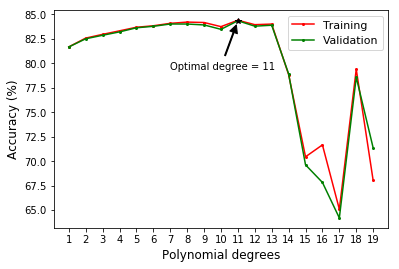

In [106]:
max_accuracy = np.amax(acc_validation)
best_degree = degrees[np.argmax(acc_validation)]

fig,ax = plt.subplots(1,1)

plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
ax.annotate('Optimal degree = %d' %(best_degree), xy=(best_degree, max_accuracy), xytext=(best_degree-4, max_accuracy-5),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.plot(best_degree, max_accuracy, marker = '*', markersize=6, color = "black")
plt.xticks(degrees)
plt.xlabel("Polynomial degrees", fontsize = 12)
plt.ylabel("Accuracy (%)",  fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend(fontsize=11)
plt.savefig("degree_group0.eps")
plt.show()

### Best lambda

In [109]:
acc_training = []
acc_validation = []

for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, best_degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, best_degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy (y_train, x_train_aug, w)
            acc_val = predict_accuracy (y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1e-08 75.95851015560359 76.55937224757787
1e-07 84.31553100061387 84.19108815757868
1e-06 84.402274001121 84.33121146609017
1e-05 84.42729602049803 84.35423172391705
0.0001 84.43463581284864 84.36624229321802
0.001 84.40260762804601 84.34922732004163
0.01 84.18608375370326 84.10200976859636


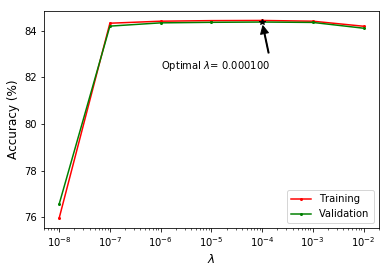

In [144]:
max_accuracy = np.amax(acc_validation)
best_lambda = lambdas[np.argmax(acc_validation)]

plt.semilogx(lambdas, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.semilogx(lambdas, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.semilogx(best_lambda, max_accuracy, marker = '*', markersize=6, color = "black")
plt.annotate('Optimal $\lambda$= %f' %(best_lambda), xy=(best_lambda, max_accuracy), xytext=(best_lambda *1e-2, max_accuracy-2),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.xlabel("$\lambda$", fontsize = 12)
plt.ylabel("Accuracy (%)", fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend()
plt.savefig("lambda_group0.eps")
plt.show()